# Task 1- Prediction using Supervised ML

Prediction using Supervised ML

(Level - Beginner)

● Predict the percentage of an student based on the no. of study hours.

● This is a simple linear regression task as it involves just 2 variables.

● You can use R, Python, SAS Enterprise Miner or any other tool

● Data can be found at http://bit.ly/w-data

● What will be predicted score if a student studies for 9.25 hrs/ day?

● Sample Solution : https://bit.ly/2HxiGGJ

● Task submission:

1. Host the code on GitHub Repository (public). Record the code and
output in a video. Post the video on YouTube

2. Share links of code (GitHub) and video (YouTube) as a post on
YOUR LinkedIn profile, not TSF Network.

3. Submit the LinkedIn link in Task Submission Form when shared.

In [10]:
import pandas as pd
import numpy as np  
from sklearn import linear_model
import matplotlib.pyplot as plt  
%matplotlib inline

In [15]:
df = pd.read_csv("http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [16]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [13]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


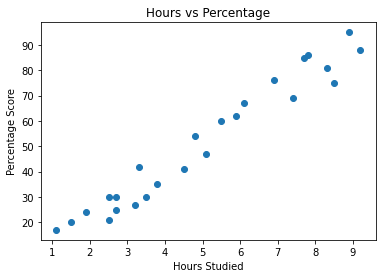

In [18]:
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.scatter(df.Hours, df.Scores)
plt.show()

In [19]:
new_df = df.drop('Scores', axis='columns')
new_df

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [20]:
Scores = df.Scores
Scores

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [21]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df, Scores)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### (1) What will be predicted score if a student studies for 9.25 hrs/ day? 

In [23]:
reg.predict([[9.25]])

array([92.90985477])

In [24]:
reg.coef_

array([9.77580339])

In [27]:
reg.intercept_

2.48367340537321

#### Y = m * X + b (m is coefficient and b is intercept)

In [28]:
9.25 * 9.77580339 + 2.48367340537321

92.90985476287321